In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [3]:
#remove warnings
warnings.filterwarnings("ignore")
#show all dataframe columns
pd.set_option('display.max_columns', None)
#show all dataframe rows
pd.set_option('display.max_rows', None)

In [5]:
# cocatinate dataframes from multiple csv files in a folder into a single dataframe
import os
def concatenate_csv_files():
    path = 'C:\\Users\\LEGION\\Downloads\\hackathon_ribo\\hackathon\\notebooks\\Data_Handeling\\transformed_data\\'
    all_files = ['seif_scraped_data.csv' , "seif_scraped_data2.csv" , 'seif_scraped_data3.csv']
    df_list = [pd.read_csv(os.path.join(path, file)) for file in all_files]
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df
df = concatenate_csv_files()
df.head()

,Name,city,Price,Superhost,is_fav,Rating,Reviews,URL
0,Stylish Serviced Apartment near Central Station,Amsterdam,"16,698 kr NOK",Yes,1,4.81,592,https://www.airbnb.com/rooms/30762441?search_m...
1,Cozy houseboat with parking in the center of A...,Amsterdam,"13,751 kr NOK",Yes,1,4.97,97269,https://www.airbnb.com/rooms/58087008775012407...
2,2 Bedroom Luxury canal view,Amsterdam,"22,861 kr NOK",Yes,1,5.0,10,https://www.airbnb.com/rooms/65991245398895048...
3,Authentic Warm Water Villa @ old city canal.,Amsterdam,"15,951 kr NOK",Yes,0,4.94,111,https://www.airbnb.com/rooms/15152694?search_m...
4,Amazing apt in historic city-centre,Amsterdam,"20,397 kr NOK",No,1,5.0,14,https://www.airbnb.com/rooms/59776778164438604...


In [7]:
df.shape

(500, 8)

In [8]:
df['city'].value_counts()

city
Barcelona    57
Amsterdam    50
Athens       50
Berlin       50
Budapest     50
Lisbon       50
London       50
Rome         50
Vienna       50
Paris        43
Name: count, dtype: int64

In [14]:
import re

def clean_and_convert(val):
    val = str(val).strip()
    if '€' in val:
        num_match = re.search(r'(\d[\d,.]*)', val)
        return float(num_match.group(1).replace(',', '')) if num_match else val

    if 'kr NOK' in val:
        num_match = re.search(r'(\d[\d,.]*)', val)
        if num_match:
            clean_num = float(num_match.group(1).replace(',', ''))
            return round(clean_num * 0.086, 2)
            
    return val

df['Price'] = df['Price'].apply(clean_and_convert)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       500 non-null    object 
 1   city       500 non-null    object 
 2   Price      500 non-null    float64
 3   Superhost  500 non-null    object 
 4   is_fav     500 non-null    int64  
 5   Rating     493 non-null    object 
 6   Reviews    500 non-null    int64  
 7   URL        500 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ KB


In [21]:
df.Rating.unique()

array([4.81, 4.97, 5.0, 4.94, nan, 4.9, 4.77, 4.91, 4.92, 4.89, 4.87, 4.8,
       4.75, 4.86, 4.74, 4.98, 4.57, 4.88, 4.84, 4.83, 4.78, 4.93, 4.95,
       4.69, 4.65, 4.73, 4.99, 4.76, 4.67, 4.85, 4.96, 4.82, '4.84',
       '4.53', '4.7', '5.0', '4.78', '4.93', '4.91', 'New', '4.75',
       '4.94', '4.65', '4.52', '4.76', '4.74', '4.9', '4.81', '4.86',
       '4.64', '4.95', '4.58', '4.82', '4.87', '4.68', '4.83', '4.85',
       '4.97', '4.98', '4.59', '4.89', '4.99', '4.92', '4.72', '4.61',
       '4.96', '4.88', '4.79', '4.66', '4.42', '4.63', '4.71', '4.38',
       '4.8', '4.67', '4.46', '4.6', '4.56', '4.44', '4.73', '4.77',
       '4.33'], dtype=object)

In [22]:
df["Rating"] = df["Rating"].replace("New", np.nan)

df['Rating'] = df['Rating'].astype('float64')

In [23]:
df.Rating.unique()

array([4.81, 4.97, 5.  , 4.94,  nan, 4.9 , 4.77, 4.91, 4.92, 4.89, 4.87,
       4.8 , 4.75, 4.86, 4.74, 4.98, 4.57, 4.88, 4.84, 4.83, 4.78, 4.93,
       4.95, 4.69, 4.65, 4.73, 4.99, 4.76, 4.67, 4.85, 4.96, 4.82, 4.53,
       4.7 , 4.52, 4.64, 4.58, 4.68, 4.59, 4.72, 4.61, 4.79, 4.66, 4.42,
       4.63, 4.71, 4.38, 4.46, 4.6 , 4.56, 4.44, 4.33])

In [24]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [27]:
df.describe()

,Price,is_fav,Rating,Reviews
count,500.000000,500.000000,500.000000,500.000000
mean,893.582260,0.660000,4.896164,26719.522000
std,556.478298,0.474183,0.106725,39687.779382
min,225.490000,0.000000,4.330000,0.000000
25%,477.587500,0.000000,4.860000,31.750000
50%,779.000000,1.000000,4.920000,907.000000
75%,1120.500000,1.000000,4.970000,81477.250000
max,4685.000000,1.000000,5.000000,99201.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       500 non-null    object 
 1   city       500 non-null    object 
 2   Price      500 non-null    float64
 3   Superhost  500 non-null    object 
 4   is_fav     500 non-null    int64  
 5   Rating     500 non-null    float64
 6   Reviews    500 non-null    int64  
 7   URL        500 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 31.4+ KB


In [32]:
df.head(5)

,Name,city,Price,Superhost,is_fav,Rating,Reviews,URL
0,Stylish Serviced Apartment near Central Station,Amsterdam,1436.03,Yes,1,4.81,592,https://www.airbnb.com/rooms/30762441?search_m...
1,Cozy houseboat with parking in the center of A...,Amsterdam,1182.59,Yes,1,4.97,97269,https://www.airbnb.com/rooms/58087008775012407...
2,2 Bedroom Luxury canal view,Amsterdam,1966.05,Yes,1,5.00,10,https://www.airbnb.com/rooms/65991245398895048...
3,Authentic Warm Water Villa @ old city canal.,Amsterdam,1371.79,Yes,0,4.94,111,https://www.airbnb.com/rooms/15152694?search_m...
4,Amazing apt in historic city-centre,Amsterdam,1754.14,No,1,5.00,14,https://www.airbnb.com/rooms/59776778164438604...


In [35]:
#let me know if the percentage of the price of apartment of superhost is higher than normal host
superhost_prices = df[df['Superhost'] == 'Yes']['Price']
normalhost_prices = df[df['Superhost'] == 'No']['Price']
average_superhost_price = superhost_prices.mean()
average_normalhost_price = normalhost_prices.mean()
percentage_difference = ((average_superhost_price - average_normalhost_price) / average_normalhost_price) * 100
print(f"Average Superhost Price: {average_superhost_price}")
print(f"Average Normal Host Price: {average_normalhost_price}")
percentage_difference = round(percentage_difference, 2)
print(f"Percentage Difference: {percentage_difference}%")

Average Superhost Price: 896.7950133333334
Average Normal Host Price: 883.944
Percentage Difference: 1.45%


In [37]:
# i want to store min , max , mean , median of price in variable and take random sample of 10 rows and show the price column along with these statistics for super host and non super host
superhost_price_stats = {
    'min': superhost_prices.min(),
    'max': superhost_prices.max(),
    'mean': superhost_prices.mean(),
    'median': superhost_prices.median()
}
normalhost_price_stats = {
    'min': normalhost_prices.min(),
    'max': normalhost_prices.max(),
    'mean': normalhost_prices.mean(),
    'median': normalhost_prices.median()
}
print("Superhost Price Statistics:", superhost_price_stats)
print("Normal Host Price Statistics:", normalhost_price_stats)
sample_df = df.sample(10)[['Price', 'Superhost']]
print("Random Sample of 10 Rows:")
print(sample_df)
#compare each samples with the statistics of the oposite statistics
for index, row in sample_df.iterrows():
    price = row['Price']
    host_type = row['Superhost']
    if host_type == 'Yes':
        comparison_stats = normalhost_price_stats
        host_label = 'Normal Host'
    else:
        comparison_stats = superhost_price_stats
        host_label = 'Superhost'
    
    comparisons = {
        # 'min_comparison': price - comparison_stats['min'],
        # 'max_comparison': price - comparison_stats['max'],
        'mean_comparison': price - comparison_stats['mean'],
        'median_comparison': price - comparison_stats['median']
    }
    
    print(f"\nPrice: {price} | Host Type: {host_type}")
    print(f"Comparisons with {host_label} Statistics: {comparisons}")

Superhost Price Statistics: {'min': 225.49, 'max': 3195.0, 'mean': np.float64(896.7950133333334), 'median': 813.0}
Normal Host Price Statistics: {'min': 249.0, 'max': 4685.0, 'mean': np.float64(883.944), 'median': 747.0}
Random Sample of 10 Rows:
      Price Superhost
423  862.32       Yes
121  573.00        No
333  562.00        No
196  465.00       Yes
218  327.00       Yes
199  989.00       Yes
347  852.00       Yes
229  370.00        No
465  652.00       Yes
176  445.00        No

Price: 862.32 | Host Type: Yes
Comparisons with Normal Host Statistics: {'mean_comparison': np.float64(-21.62399999999991), 'median_comparison': 115.32000000000005}

Price: 573.0 | Host Type: No
Comparisons with Superhost Statistics: {'mean_comparison': np.float64(-323.7950133333334), 'median_comparison': -240.0}

Price: 562.0 | Host Type: No
Comparisons with Superhost Statistics: {'mean_comparison': np.float64(-334.7950133333334), 'median_comparison': -251.0}

Price: 465.0 | Host Type: Yes
Comparisons wi

In [42]:
real_df = pd.read_csv("C:\\Users\\LEGION\\Downloads\\hackathon_ribo\\hackathon\\notebooks\\Data_Handeling\\transformed_data\\final_data.csv")

In [43]:
real_df.head()

,price_total,room_type,is_shared_room,is_private_room,max_guests,is_superhost,is_multi_listing,is_business_listing,cleanliness_score,guest_satisfaction_score,num_bedrooms,distance_city_center,distance_metro,attraction_index,attraction_index_norm,restaurant_index,restaurant_index_norm,longitude,latitude,city,day_type,district,state,country_code,country_name,Crime_Index,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC
0,194.033698,Private room,0,1,2.0,0,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekday,Gemeente Landsmeer,North Holland,NL,Netherlands,25.7,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29
1,344.245776,Private room,0,1,4.0,0,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29
2,264.101422,Private room,0,1,2.0,0,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekday,Gemeente Diemen,North Holland,NL,Netherlands,25.7,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29
3,433.529398,Private room,0,1,4.0,0,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29
4,485.552926,Private room,0,1,2.0,1,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29


# Replace SuperHost with NormalHost and Verce vice


In [44]:
for index, row in real_df.iterrows():
    if row['is_superhost'] == 1:
        real_df.at[index, 'is_superhost'] = 0
    else:
        real_df.at[index, 'is_superhost'] = 1

In [45]:
real_df.head()

,price_total,room_type,is_shared_room,is_private_room,max_guests,is_superhost,is_multi_listing,is_business_listing,cleanliness_score,guest_satisfaction_score,num_bedrooms,distance_city_center,distance_metro,attraction_index,attraction_index_norm,restaurant_index,restaurant_index_norm,longitude,latitude,city,day_type,district,state,country_code,country_name,Crime_Index,Safety_Index,Monthly_Average_Net_salary,Meal_at_Inexpensive_Restaurant,Taxi_price_per_Km,Monthly_Basic_Utilities,Monthly_Rent_One_Bedroom_CC,Monthly_Rent_One_Bedroom_OCC,Monthly_Rent_Three_Bedroom_CC,Monthly_Rent_Three_Bedroom_OCC
0,194.033698,Private room,0,1,2.0,1,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Amsterdam,weekday,Gemeente Landsmeer,North Holland,NL,Netherlands,25.7,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29
1,344.245776,Private room,0,1,4.0,1,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29
2,264.101422,Private room,0,1,2.0,1,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Amsterdam,weekday,Gemeente Diemen,North Holland,NL,Netherlands,25.7,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29
3,433.529398,Private room,0,1,4.0,1,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29
4,485.552926,Private room,0,1,2.0,0,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Amsterdam,weekday,Gemeente Amsterdam,North Holland,NL,Netherlands,25.7,74.3,4502.1,20.5,3.0,262.0,2178.68,1701.26,3725.5,2785.29


In [66]:
# Double check these names match your print(df.columns) output!
def calculate_proximity_score(row):
    k = 0.5 
    # Use the exact names found in your dataframe
    # If the column is actually 'dist_city_center', change it here:
    score_city = 1 / (row['distance_city_center'] + k) 
    score_metro = 1 / (row['distance_metro'] + k)
    
    # Example weights: 70% City Center, 30% Metro
    total_factor = (score_city * 0.70) + (score_metro * 0.30) 
    return total_factor

real_df['proximity_index'] = real_df.apply(calculate_proximity_score, axis=1)

In [67]:
real_df['price_total'] = real_df['price_total'] * real_df['proximity_index']

In [68]:
real_df.columns

Index(['price_total', 'room_type', 'is_shared_room', 'is_private_room',
       'max_guests', 'is_superhost', 'is_multi_listing', 'is_business_listing',
       'cleanliness_score', 'guest_satisfaction_score', 'num_bedrooms',
       'distance_city_center', 'distance_metro', 'attraction_index',
       'attraction_index_norm', 'restaurant_index', 'restaurant_index_norm',
       'longitude', 'latitude', 'city', 'day_type', 'district', 'state',
       'country_code', 'country_name', 'Crime_Index', 'Safety_Index',
       'Monthly_Average_Net_salary', 'Meal_at_Inexpensive_Restaurant',
       'Taxi_price_per_Km', 'Monthly_Basic_Utilities',
       'Monthly_Rent_One_Bedroom_CC', 'Monthly_Rent_One_Bedroom_OCC',
       'Monthly_Rent_Three_Bedroom_CC', 'Monthly_Rent_Three_Bedroom_OCC',
       'proximity_index'],
      dtype='object')

<Axes: >

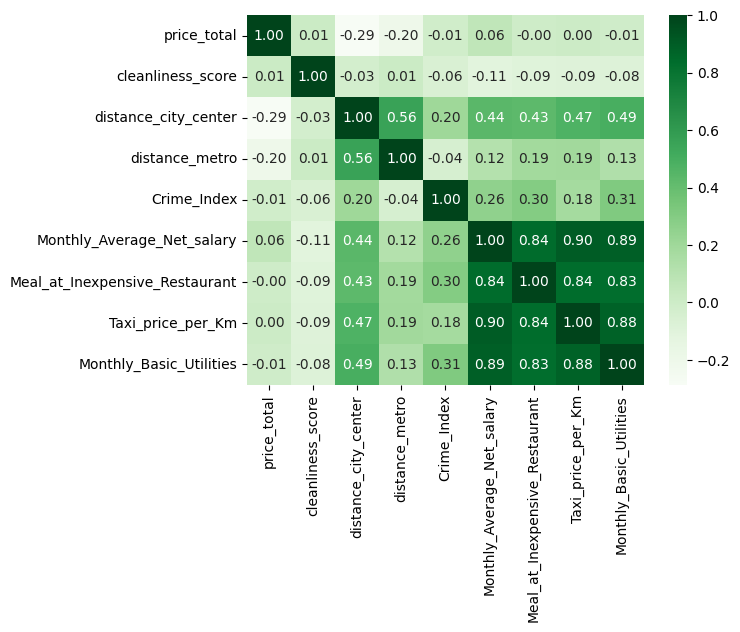

In [69]:
numerical_cols = ['price_total' ,'cleanliness_score' , 'distance_city_center' , 'distance_metro' , 'Crime_Index' , 'Monthly_Average_Net_salary' ,
                  'Meal_at_Inexpensive_Restaurant' , 'Taxi_price_per_Km' , 'Monthly_Basic_Utilities' ]
sns.heatmap(real_df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='Greens')

# Calculate Present Worth based on prices 8 years ago to now (F/P , 10% , 8)


In [70]:
real_df['price_total'] = real_df['price_total'] * 2.144